# EDA Notes

A first attempt at EDA for the CS109 final project. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegressionCV
%matplotlib inline

**Read In Data**

In [2]:
checkins = pd.read_csv('Data/checkin_summary.csv', header=None)
photos = pd.read_csv('Data/photos_summary.csv', header=None)
reviews = pd.read_csv('Data/review_small.csv', header=None)
biz = pd.read_csv('Data/small_businesses.csv')
tips = pd.read_csv('Data/tip_summary.csv', header=None)
users = pd.read_json(path_or_buf='Data/user_small.json', lines=True)

/Users/maiawoluchem/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (1,10,12,14,20,63,64,74) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
#Explore data in its current state

In [3]:
checkins.shape, photos.shape, reviews.shape, biz.shape, tips.shape, users.shape

((49414, 2), (26384, 2), (2927859, 4), (38668, 93), (558979, 3), (1183362, 5))

In [4]:
checkins.columns = ['business_id', 'num_checkins'] 
checkins.head()

,business_id,num_checkins
0,--6MefnULPED_I942VcFNA,122
1,--9e1ONYQuAa-CB_Rrw7Tw,2469
2,--DaPTJW3-tB1vP-PfdTEg,88
3,--FBCX-N37CMYDfs790Bnw,477
4,--GM_ORV2cYS-h38DSaCLw,13


In [5]:
photos.columns = ['business_id', 'num_photos'] 
photos.head()

,business_id,num_photos
0,--6MefnULPED_I942VcFNA,1
1,--9e1ONYQuAa-CB_Rrw7Tw,127
2,--DaPTJW3-tB1vP-PfdTEg,1
3,--FBCX-N37CMYDfs790Bnw,4
4,--KCl2FvVQpvjzmZSPyviA,3


In [6]:
reviews.columns = ['user_id', 'business_id', 'rating', 'date'] 
reviews.head()

,user_id,business_id,rating,date
0,V2exkc2JwEdc8UNUNhT7sg,--6MefnULPED_I942VcFNA,5,2016-08-25
1,j97y1ZAsYABIOcR0KQCy5Q,--6MefnULPED_I942VcFNA,1,2010-12-06
2,8-KBKMJVO-j5YqpHb08j9w,--6MefnULPED_I942VcFNA,4,2015-08-05
3,CxDOIDnH8gp9KXzpBHJYXw,--6MefnULPED_I942VcFNA,2,2010-12-22
4,7Dykd1HolQx8mKPYhYDYSg,--6MefnULPED_I942VcFNA,2,2017-02-07


In [7]:
biz.columns=biz.columns.str.replace('attributes.','')
biz.columns=biz.columns.str.replace('.',"_")
biz.head()

,Ambience_divey,HairSpecializesIn_kids,RestaurantsDelivery,Open24Hours,Ambience_trendy,DogsAllowed,CoatCheck,postal_code,Smoking,DietaryRestrictions_halal,...,RestaurantsReservations,DietaryRestrictions_dairy-free,BestNights_wednesday,DietaryRestrictions_vegan,Ambience_romantic,Music_jukebox,Ambience_upscale,RestaurantsTakeOut,BikeParking,OutdoorSeating
0,False,NaN,False,NaN,False,NaN,False,28105,NaN,NaN,...,False,NaN,NaN,NaN,False,False,False,True,True,False
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28164,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2,True,NaN,False,NaN,False,NaN,NaN,15224,NaN,NaN,...,False,NaN,NaN,NaN,False,NaN,False,True,True,False
3,NaN,NaN,False,NaN,NaN,NaN,NaN,L5W 0E6,NaN,NaN,...,True,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,True
4,False,NaN,False,NaN,False,NaN,NaN,53704,NaN,NaN,...,True,NaN,NaN,NaN,False,NaN,False,True,True,False


In [8]:
#Merge reviews and business
full_biz = pd.merge(reviews, biz, on='business_id', how='inner')

In [9]:
full_biz.shape, reviews.shape, biz.shape

((2531183, 96), (2927859, 4), (38668, 93))

In [10]:
#Drop where more than 50 percent missing
full_biz = full_biz.dropna(thresh=len(full_biz) - 1265591, axis=1)

In [ ]:
#columns = list(full_biz.columns)

In [ ]:
#full_biz[columns[:20]].head()

In [ ]:
#full_biz[columns[20:40]].head()

In [ ]:
#full_biz[columns[40:]].head()

In [11]:
binary_vars = ["Caters","RestaurantsReservations","Ambience_romantic","Ambience_upscale",
               "RestaurantsTakeOut","BikeParking","OutdoorSeating","BusinessParking_lot","HasTV","GoodForMeal_dinner",
               "BusinessParking_street","GoodForMeal_breakfast","BusinessParking_garage","BusinessParking_valet",
               "WheelchairAccessible","Ambience_intimate","Ambience_hipster","BusinessAcceptsCreditCards",
               "GoodForMeal_brunch","Ambience_classy","RestaurantsTableService","GoodForMeal_latenight",
               "GoodForMeal_dessert","Ambience_touristy","BusinessParking_validated","GoodForMeal_lunch",
               "RestaurantsGoodForGroups","GoodForKids","Ambience_casual","Ambience_divey","RestaurantsDelivery",
               "Ambience_trendy"]


In [12]:
text_vars = ["user_id","business_id","postal_code","city","categories",
             "name","neighborhood","state"]

In [13]:
float_vars = ["latitude","longitude","is_open","rating","stars","review_count","RestaurantsPriceRange2"]

In [14]:
cat_vars = ["Alcohol","WiFi","NoiseLevel","RestaurantsAttire"]

In [15]:
date_vars = ['date']

In [16]:
count = len(binary_vars)+len(text_vars)+len(float_vars)+len(cat_vars)+1
count

52

In [17]:
for var in binary_vars:
    full_biz[var] = 1*full_biz[var]
    
binary_df = full_biz[binary_vars].replace(np.nan, np.nan, regex=True)
binary_df.head()

,Caters,RestaurantsReservations,Ambience_romantic,Ambience_upscale,RestaurantsTakeOut,BikeParking,OutdoorSeating,BusinessParking_lot,HasTV,GoodForMeal_dinner,...,GoodForMeal_dessert,Ambience_touristy,BusinessParking_validated,GoodForMeal_lunch,RestaurantsGoodForGroups,GoodForKids,Ambience_casual,Ambience_divey,RestaurantsDelivery,Ambience_trendy
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,NaN,0.0,0.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,NaN,0.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,NaN,0.0,0.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,NaN,0.0,0.0
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,NaN,0.0,0.0


In [18]:
for var in text_vars:
    full_biz[var] = full_biz[var].replace(np.nan, '', regex=True)
    full_biz[var] = full_biz[var].astype(str)
    
text_df = full_biz[text_vars]
text_df.head()

,user_id,business_id,postal_code,city,categories,name,neighborhood,state
0,V2exkc2JwEdc8UNUNhT7sg,--6MefnULPED_I942VcFNA,L4B 3P7,Richmond Hill,"['Restaurants', 'Chinese']",John's Chinese BBQ Restaurant,,ON
1,j97y1ZAsYABIOcR0KQCy5Q,--6MefnULPED_I942VcFNA,L4B 3P7,Richmond Hill,"['Restaurants', 'Chinese']",John's Chinese BBQ Restaurant,,ON
2,8-KBKMJVO-j5YqpHb08j9w,--6MefnULPED_I942VcFNA,L4B 3P7,Richmond Hill,"['Restaurants', 'Chinese']",John's Chinese BBQ Restaurant,,ON
3,CxDOIDnH8gp9KXzpBHJYXw,--6MefnULPED_I942VcFNA,L4B 3P7,Richmond Hill,"['Restaurants', 'Chinese']",John's Chinese BBQ Restaurant,,ON
4,7Dykd1HolQx8mKPYhYDYSg,--6MefnULPED_I942VcFNA,L4B 3P7,Richmond Hill,"['Restaurants', 'Chinese']",John's Chinese BBQ Restaurant,,ON


In [19]:
for var in cat_vars:
    full_biz[var] = full_biz[var].replace(np.nan, '', regex=True)
    full_biz[var] = full_biz[var].astype(str)
    
cat_df = full_biz[cat_vars]
cat_df.head()

,Alcohol,WiFi,NoiseLevel,RestaurantsAttire
0,beer_and_wine,no,quiet,casual
1,beer_and_wine,no,quiet,casual
2,beer_and_wine,no,quiet,casual
3,beer_and_wine,no,quiet,casual
4,beer_and_wine,no,quiet,casual


In [20]:
for var in date_vars:
    full_biz[var] = full_biz[var].replace(np.nan, '', regex=True)
    full_biz[var] = full_biz[var].astype(str)
    
date_df = full_biz[date_vars]
date_df.head()

,date
0,2016-08-25
1,2010-12-06
2,2015-08-05
3,2010-12-22
4,2017-02-07


In [21]:
for var in float_vars:
    full_biz[var] = 1*full_biz[var]
    
float_df = full_biz[float_vars].replace(np.nan, np.nan, regex=True)
float_df.head()

,latitude,longitude,is_open,rating,stars,review_count,RestaurantsPriceRange2
0,43.840905,-79.399604,1,5,3.0,30,2.0
1,43.840905,-79.399604,1,1,3.0,30,2.0
2,43.840905,-79.399604,1,4,3.0,30,2.0
3,43.840905,-79.399604,1,2,3.0,30,2.0
4,43.840905,-79.399604,1,2,3.0,30,2.0


In [22]:
full_biz2 = binary_df.join(text_df)
full_biz2 = full_biz2.join(float_df)
full_biz2 = full_biz2.join(cat_df)
full_biz2 = full_biz2.join(date_df)

In [ ]:
full_biz2.dtypes

In [31]:
count_states = full_biz2.groupby('state').is_open.sum()
count_states

state
01         24
3           5
ABE         3
AZ     716955
BW      22097
BY         10
C         168
CA          4
EDH     20119
ELN        96
ESX         8
FIF       104
HH          4
HLD       564
IL      18949
KHL         7
MLN       963
NC     158907
NI         47
NV     820430
NY         70
NYK       101
OH     137516
ON     354382
PA     125869
PKN        24
QC      88812
RCC         7
SC       4975
ST         24
WA         39
WHT         4
WI      59810
WLN        77
XGL         6
ZET         3
Name: is_open, dtype: int64

In [29]:
#Where are our reviews coming from?

count_state = pd.value_counts(full_biz2.state).to_frame('count')
count_state

,count
NV,820430
AZ,716955
ON,354382
NC,158907
OH,137516
PA,125869
QC,88812
WI,59810
BW,22097
EDH,20119


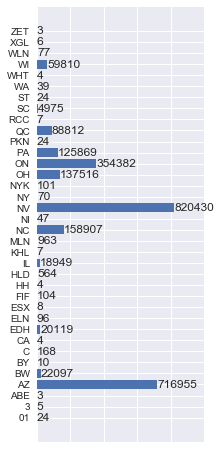

In [34]:
import seaborn as sns

plt.figure(figsize=(3, 8))
ax = plt.gca()
data = count_states.sort_values()
states = count_states.index
counts = count_states.values
nums = np.arange(len(data))
plt.barh(nums, counts)
for p, c, ch in zip(nums, states, counts):
    plt.annotate(str(ch), xy=(ch + 1, p), va='center')
ticks = plt.yticks(nums, states)
xt = plt.xticks()[0]
plt.xticks(xt, [' '] * len(xt))
plt.grid(axis = 'x', color ='white', linestyle='-')
ax.tick_params(axis='both', which='both',length=0)
sns.despine(left=True, bottom=True)

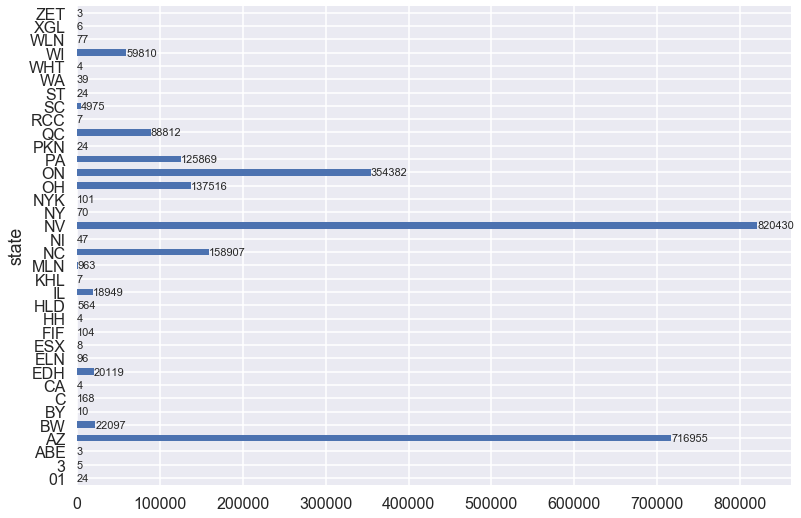

In [39]:
with sns.plotting_context("poster"):
    ax = plt.gca()
    count_states.plot(kind="barh")
    plt.grid(axis = 'x', color ='white', linestyle='-')
    ax.tick_params(axis='both', which='both',length=0)
    for p, c, ch in zip(nums, states, counts):
        plt.annotate(str(ch), xy=(ch + 1, p), va='center', size=11)
    sns.despine(left=True, bottom=True)

In [42]:
#Select NV, AZ, ON, NC, OH, PA, QC, WI, BW

states = ['NV','AZ','ON','NC','OH','PA','QC','WI','BW']
#full_biz2 = 
geo_subset_biz = full_biz2[full_biz2['state'].isin(['NV','AZ','ON','NC','OH','PA','QC','WI','BW'])]
#df[df['A'].isin([3, 6])]

In [43]:
geo_subset_biz.head()

,Caters,RestaurantsReservations,Ambience_romantic,Ambience_upscale,RestaurantsTakeOut,BikeParking,OutdoorSeating,BusinessParking_lot,HasTV,GoodForMeal_dinner,...,is_open,rating,stars,review_count,RestaurantsPriceRange2,Alcohol,WiFi,NoiseLevel,RestaurantsAttire,date
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,1,5,3.0,30,2.0,beer_and_wine,no,quiet,casual,2016-08-25
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,1,1,3.0,30,2.0,beer_and_wine,no,quiet,casual,2010-12-06
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,1,4,3.0,30,2.0,beer_and_wine,no,quiet,casual,2015-08-05
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,1,2,3.0,30,2.0,beer_and_wine,no,quiet,casual,2010-12-22
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,1,2,3.0,30,2.0,beer_and_wine,no,quiet,casual,2017-02-07


In [72]:
geo_subset_biz.shape
geo_subset_biz.categories=geo_subset_biz.categories.str.replace('[',"")
geo_subset_biz.categories=geo_subset_biz.categories.str.replace(']',"")
geo_subset_biz.categories=geo_subset_biz.categories.str.replace("'","")
#biz.columns=biz.columns.str.replace('[',"")
geo_subset_biz.categories.unique()
len(geo_subset_biz.categories.unique())

/Users/maiawoluchem/anaconda/lib/python3.6/site-packages/pandas/core/generic.py:2999: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


18557

In [69]:
uniques = list(geo_subset_biz.categories.unique())
newlist = []
for word in uniques:
    word = word.split(",")
    #word = word.replace(' ','')
    newlist.extend(word)  # <----

newlist = [x.strip(' ') for x in newlist]

newlist

#for i in newlist:
    #j = i.replace(' ','')
    #k.append(j)
#mylist = string.split(',')
#flattened = [val for sublist in uniques for val in sublist]
#flattened

['Restaurants',
 'Chinese',
 'Steakhouses',
 'Cajun/Creole',
 'Restaurants',
 'Restaurants',
 'Breakfast & Brunch',
 'Food',
 'Beer',
 'Wine & Spirits',
 'Bars',
 'Restaurants',
 'American (New)',
 'Nightlife',
 'Salad',
 'Restaurants',
 'Chicken Wings',
 'Pizza',
 'Restaurants',
 'Sports Bars',
 'Nightlife',
 'Bars',
 'American (Traditional)',
 'Sandwiches',
 'Pizza',
 'Restaurants',
 'Chicken Wings',
 'Fast Food',
 'Restaurants',
 'Diners',
 'American (Traditional)',
 'Breakfast & Brunch',
 'Restaurants',
 'Chinese',
 'Restaurants',
 'Restaurants',
 'Pizza',
 'Restaurants',
 'Peruvian',
 'Spanish',
 'Latin American',
 'Restaurants',
 'Italian',
 'German',
 'Restaurants',
 'Sports Bars',
 'Nightlife',
 'Bars',
 'American (New)',
 'Sandwiches',
 'American (Traditional)',
 'Sports Bars',
 'Bars',
 'Nightlife',
 'Restaurants',
 'Restaurants',
 'Pizza',
 'Chicken Wings',
 'Italian',
 'Asian Fusion',
 'Restaurants',
 'Pizza',
 'Restaurants',
 'Bars',
 'Southern',
 'Restaurants',
 'Nightlif

In [ ]:
#full_biz.GoodForMeal_breakfast.unique()
geo_subset.

In [71]:
df = pd.value_counts(newlist).to_frame().reset_index()
df

,index,0
0,Restaurants,18546
1,Food,6546
2,Nightlife,4702
3,Bars,4538
4,American (Traditional),3129
5,Sandwiches,2895
6,Breakfast & Brunch,2434
7,American (New),2130
8,Burgers,1693
9,Pizza,1690


In [ ]:
#full_biz.dtypes

In [ ]:
uniques = list(full_biz.categories.unique())


In [ ]:
flat_list = [item for sublist in l for item in sublist]

In [ ]:
#flat_list = [item for sublist in l for item in sublist]

for sublist in uniques:
    for item in sublist:
        flat_list.append(item)

In [ ]:
def iterFlatten(root):
    if isinstance(root, (list, tuple)):
        for element in root:
            for e in iterFlatten(element):
                yield e
    else:
        yield root

In [ ]:
#list(iterFlatten(uniques))

In [ ]:
import itertools
#list_of_cats = list(itertools.chain.from_iterable(uniques))
#list_of_cats = sum(uniques, [])
list_of_cats = []
map(list_of_cats.extend, uniques)

In [ ]:
list_of_cats

In [ ]:
""float_vars = ['stars','latitude','RestaurantsPriceRange2','longitude']
int_vars = ['is_open','review_count']""

In [ ]:
test_vars = list(full_biz.columns)
#test_vars

In [ ]:
test_vars

In [ ]:
full_biz2.dtypes

In [ ]:
import seaborn as sns
fig, ax = plt.subplots(1,1, figsize =(10,8))
sns.heatmap(full_biz2.corr(), ax=ax)

In [ ]:
#dropping based on collinearity

#We have relatively few collinear points although we do have quite a few missing values - this is something 
#we'll discover soon enough in later EDA. 



In [ ]:
#full_biz2.dtypes

In [ ]:


full_biz2.WiFi = full_biz2.WiFi.replace(np.nan, '', regex=True)
full_biz2.WiFi.unique()

In [ ]:
object_to_text_vars = ['user_id', 'business_id', 'postal_code','city','Alcohol','categories','name',
                       'WiFi','NoiseLevel','state','date']

for var in object_to_text_vars:
    full_biz2[var] = full_biz2[var].replace(np.nan, '', regex=True)


In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(9, 8))
plt.scatter( full_biz2.rating, full_biz2.GoodForMeal_breakfast, color=sns.color_palette(), alpha=0.75)
plt.xlabel("User's Average Rating")
plt.ylabel('Number of Reviews')
plt.title('Average Rating by User Activity') 

In [ ]:
good_for = ['Good']

In [ ]:
#plt.scatter(full_biz2.rating, full_biz2.GoodForMeal_breakfast)



x_filt = full_biz2.rating[GoodForMeal_breakfast>0]
y_filt = full_biz2.GoodForMeal_breakfast[GoodForMeal_breakfast>0]

plt.scatter(x_filt, y_filt)

In [ ]:
"""full_biz2['new'] = full_biz2['user_id'].str.split(',') 
#df['column_new'] = df['column'].str.split(',') 
full_biz2.dtypes"""

In [ ]:
full_biz2.state.unique()

In [ ]:
tips.columns = ['business_id', 'user_id', 'unidentifiedinfo_tips'] 

tips['business_id'] = tips['business_id'].map(lambda x: x[1:])
tips['user_id'] = tips['user_id'].map(lambda x: x[:-1])
tips.head()

In [ ]:
users.head()

In [ ]:
"""
Based on this knowledge, the following EDA steps may be necessary:

1. Label column headers - 
    a. Check-ins: User_ID, # of Check-ins
    b. Photos: User_ID, # of Photos
    c. Review: Business_ID?, User_ID?, Stars, Date (of the review?)
    d. Biz: Use column headers from dataset
    e. Tips: Business_ID, User_ID, # of tips?
    
    Questions that arise:
    - We have a wide range in the number of records across sets. Is it because 
    of the number of businesses, number of users, or both? We should confirm
    the population of each set and make sure we're clear on that in this EDA.
    
2. Merge variables as needed - 
    a. It may be easiest to work with one large dataset that is at the user-level
    that contains all of the information that we need. If so, the following pieces
    may be necessary:
    b. Determine what level we should be working at - user, review, or business
        i. Seems like we should be at the user-level, in which case, will we have 
        multiple duplicates for the users depending on how many reviews we have?
    c. Merge depending on level determined.
    
    Questions that arise:
    - 
    
3. Basic cleaning - 
    a. Do we have duplicates in any of these datasets? If so, why?
    b. Missing values - 
        i. Due to that merging, we should have missing values in some users
        ii. Figure out a strategy for dealing with those missing values. 
    
4. Do basic EDA - 

    a. How many unique users? Businesses? Reviews? 
    b. User behavior - 
        i. What do the most and least active users look like? Are they enthusiastic?
            Do they travel? 
        ii. Do a user's reviews tend to favor a particular style of restaurant 
            (is there a clustering of taste inherent in the data already)?
        iii. What do reviews look like? Are there certain variables that are 
            are always missing? 
    
    Questions that arise:
        - Do we have enough information about folks to adequately make these predictions?
            What else might we need to impute?
            
